In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils


sns.set(style='white', context='notebook', palette='deep')

In [5]:
# Load the data
train = pd.read_csv("csv/train.csv")
test = pd.read_csv("csv/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

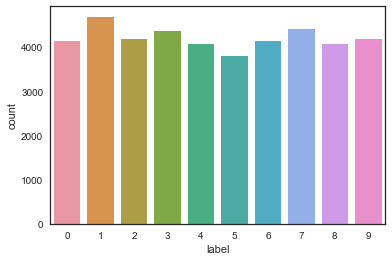

In [6]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [7]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# Set the random seed
random_seed = 2

In [13]:
# Split the train and the validation set for the fitting
print(X_train.shape)
print(Y_train.shape)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

(42000, 28, 28, 1)
(42000, 10)


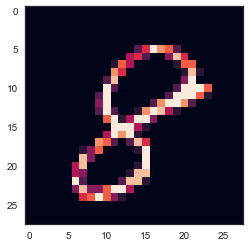

In [14]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [15]:
num_classes=10

In [26]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=80, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
 - 153s - loss: 0.2190 - acc: 0.9311 - val_loss: 0.0568 - val_acc: 0.9812
Epoch 2/20


In [22]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [23]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("./submission.csv",index=False)

print('Saved file') 

Saved file
